In [955]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import norm

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [956]:
remove = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
df = df.drop(remove, axis="columns")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [957]:
dummies = pd.get_dummies(df.Sex)
df = pd.concat([df,dummies], axis="columns")
df = df.drop(["Sex", "male"], axis="columns")

In [958]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


In [959]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
dtype: int64

In [960]:
df.shape

(891, 7)

In [961]:
# mean_age = df.Age.mean()
# df.Age = df.Age.fillna(mean_age)
# df.isna().sum()
df = df.dropna()

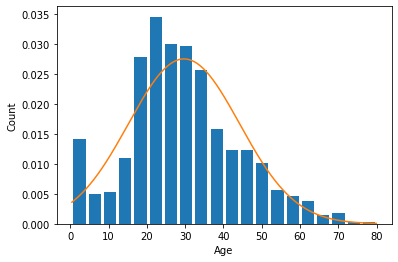

In [962]:
plt.hist(df.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(df.Age.min(), df.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Age.mean(),df.Age.std()))

In [963]:
# age_mean = df.Age.mean()
# age_std = df.Age.std()

In [964]:
# df = df[(df.Age > age_mean - age_std) & (df.Age < age_mean + age_std)]
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_lmt = Q1 - 1.5 * IQR
upper_lmt = Q3 + 1.5 * IQR
df = df[(df.Age > lower_lmt) & (df.Age < upper_lmt)]

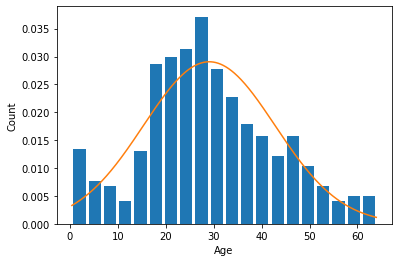

In [965]:
plt.hist(df.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(df.Age.min(), df.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Age.mean(),df.Age.std()))

In [966]:
df.shape

(703, 7)

In [967]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


In [968]:
# fare_mean = df.Fare.mean()
# fare_std = df.Fare.std()

In [969]:
# df = df[(df.Fare > fare_mean - fare_std) & (df.Fare < fare_mean + fare_std)]
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1
lower_lmt = Q1 - 1.5 * IQR
upper_lmt = Q3 + 1.5 * IQR
df = df[(df.Fare > lower_lmt) & (df.Fare < upper_lmt)]


In [970]:
df.shape

(607, 7)

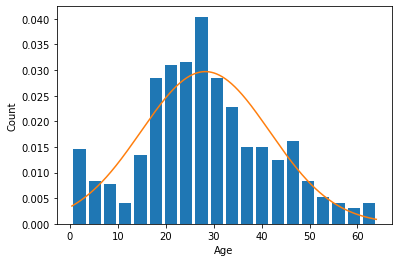

In [971]:
plt.hist(df.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(df.Age.min(), df.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Age.mean(),df.Age.std()))

In [972]:
df.Age.min()

0.42

In [973]:
X = df.drop(["Survived"], axis="columns")
y = df["Survived"]

In [974]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [975]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8032786885245902

In [976]:
# model_params = {
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#                 'n_estimators': randint(10,100),
#                 "max_features": randint(1,64),
#                 'max_depth': [randint(5,50), None],
#                 "min_samples_split": randint(2,11),
#                 "min_samples_leaf": randint(1,11),
#                 "criterion":['gini','entropy'],
#                 "bootstrap": [True, False],
#         }
#     },
# }

# score = []

# for model_name, mp in model_params.items():
#     clf =  RandomizedSearchCV(mp['model'], mp['params'], n_iter=200, cv=3,scoring='accuracy')
#     clf.fit(X, y)
#     score.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(score,columns=['model','best_score','best_params'])
# df

In [977]:
# for i, j in df["best_params"][0].items():
#     print("{}='{}',".format(i,j), end=" ")

In [978]:
model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=22)
model.fit(X, y)
# model.score(x_test, y_test)

RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=22)

In [979]:
test = pd.read_csv("test.csv")
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [980]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [981]:
result = pd.DataFrame()
result["PassengerId"] = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "Cabin", "Embarked", "Ticket"], axis="columns")
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [982]:
dummies = pd.get_dummies(test.Sex)
test = pd.concat([test,dummies], axis="columns")
test = test.drop(["Sex", "male"], axis="columns")

In [985]:
test.isna().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
female     0
dtype: int64

In [987]:
mean_age = test.Age.mean()
test.Age = test.Age.fillna(mean_age)

In [988]:
mean_fare = test.Fare.mean()
test.Fare = test.Fare.fillna(mean_fare)

In [990]:
result["Survived"] = model.predict(test)

In [991]:
result.to_csv("submission.csv", index=False)